# *DIAGNOSIS OF HEART DISEASE*

## Initialize

In [1]:
import pandas as pd; # data processing
import numpy as np; # linear algebra
# visual
import matplotlib.pyplot as plt; #plotting data
import seaborn as sns;
import plotly.express as px;
from pandas.plotting import radviz
# machine l.
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv("Kalp_Hastalığı_Tespiti/Heart.csv").iloc[:,1:] # Fist line is patient index

## Inspect the Document

In [3]:
data.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [4]:
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
data.shape

(303, 14)

In [6]:
data.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

In [7]:
data.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [8]:
'''
AHD : 'atherosclerotic heart disease' -> object -> to be transformed (ordinal)
Ca : Calcium -> empty should be dropped or filled
Thal: Thalassemia, inherited blood disorder. -> object -> to be dropped as column or transformed
ChestPain : object -> tb. transformed (ordinal encoding)
'''

"\nAHD : 'atherosclerotic heart disease' -> object -> to be transformed (ordinal)\nCa : Calcium -> empty should be dropped or filled\nThal: Thalassemia, inherited blood disorder. -> object -> to be dropped as column or transformed\nChestPain : object -> tb. transformed (ordinal encoding)\n"

## Clean or Alter the Document

In [9]:
data["Thal"] = data["Thal"].fillna(method ="ffill" )

In [10]:
data["Ca"] = data["Ca"].fillna(0)

In [11]:
transform = OrdinalEncoder()

transform = OrdinalEncoder()
columns_to_encode = ["AHD", "ChestPain", "Thal"]

data[columns_to_encode] = transform.fit_transform(data[columns_to_encode])

In [12]:
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3.0,145,233,1,2,150,0,2.3,3,0.0,0.0,0.0
1,67,1,0.0,160,286,0,2,108,1,1.5,2,3.0,1.0,1.0
2,67,1,0.0,120,229,0,2,129,1,2.6,2,2.0,2.0,1.0
3,37,1,1.0,130,250,0,0,187,0,3.5,3,0.0,1.0,0.0
4,41,0,2.0,130,204,0,2,172,0,1.4,1,0.0,1.0,0.0


In [13]:
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

## Data Analysis and Visualization

In [14]:
data.AHD.value_counts()

AHD
0.0    164
1.0    139
Name: count, dtype: int64

In [15]:
'''
0 : Healthy -> 164 
1 : Sick -> 139
'''

'\n0 : Healthy -> 164 \n1 : Sick -> 139\n'

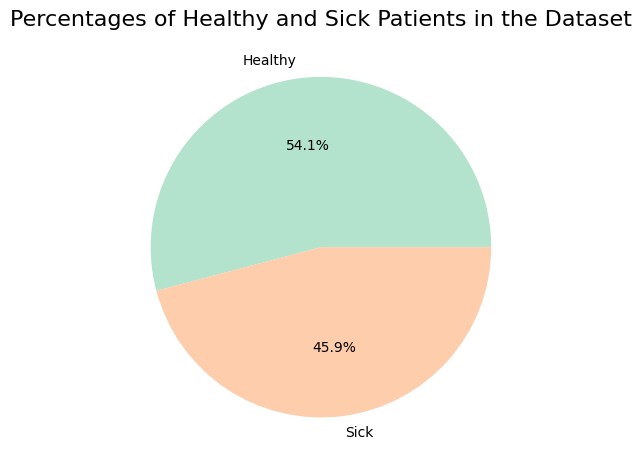

In [16]:
fig, x = plt.subplots()

_ = x.pie(x = data.AHD.value_counts(), labels = ["Healthy","Sick"], autopct='%1.1f%%',
           colors=plt.cm.Pastel2(range(80)))

x.set_title("Percentages of Healthy and Sick Patients in the Dataset", size = 16)

plt.tight_layout()
plt.show()

In [17]:
data.corr() # To check correlation of the tests done for patients

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
Age,1.000000,-0.097542,-0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.063573,0.223120
Sex,-0.097542,1.000000,-0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.209472,0.276816
ChestPain,-0.104139,-0.010084,1.000000,0.036077,-0.072319,0.039975,-0.067505,0.334422,-0.384060,-0.202277,-0.152050,-0.233117,-0.178841,-0.414446
RestBP,0.284946,-0.064456,0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.059035,0.150825
Chol,0.208950,-0.199915,-0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.087283,0.085164
Fbs,0.118530,0.047862,0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,-0.024589,0.025264
RestECG,0.148868,0.021647,-0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,-0.005831,0.169202
MaxHR,-0.393806,-0.048663,0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.115154,-0.417167
ExAng,0.091661,0.146201,-0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.215642,0.431894
Oldpeak,0.203805,0.102173,-0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.208759,0.424510


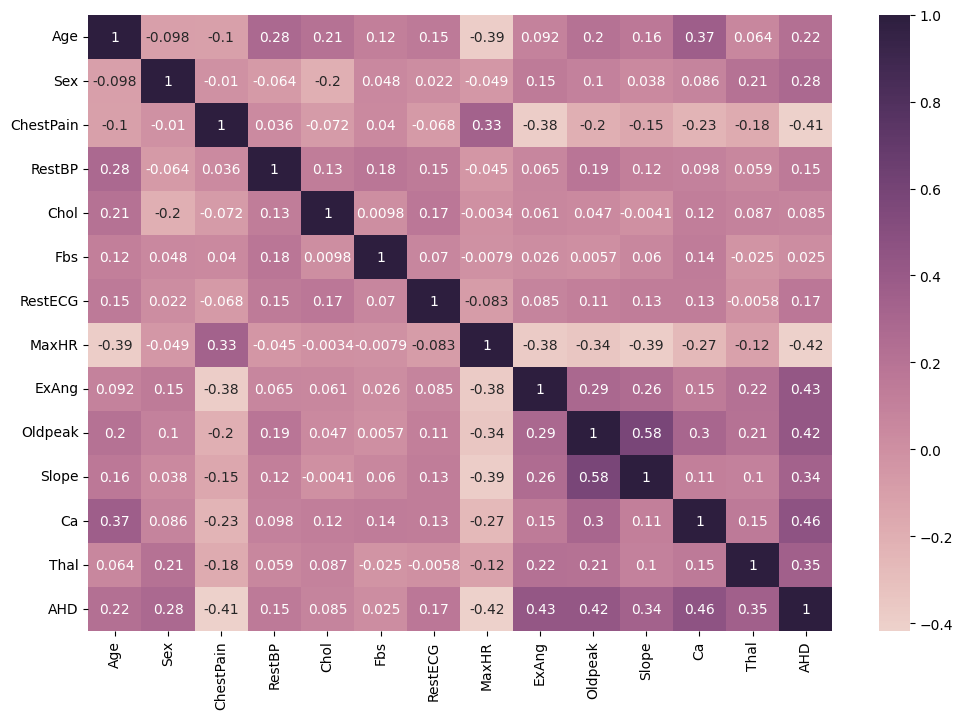

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
_ = sns.heatmap(data = data.corr(), annot = True, cmap=sns.cubehelix_palette(as_cmap=True),ax=ax) # Turn table to heatmap for better visualization

In [19]:
# Seperate data to dependent and independent variables

X = data.iloc[:,:-1]
y = data.iloc[:, -1:]

print("X: ",X.shape)
print("y: ",y.shape)

X:  (303, 13)
y:  (303, 1)


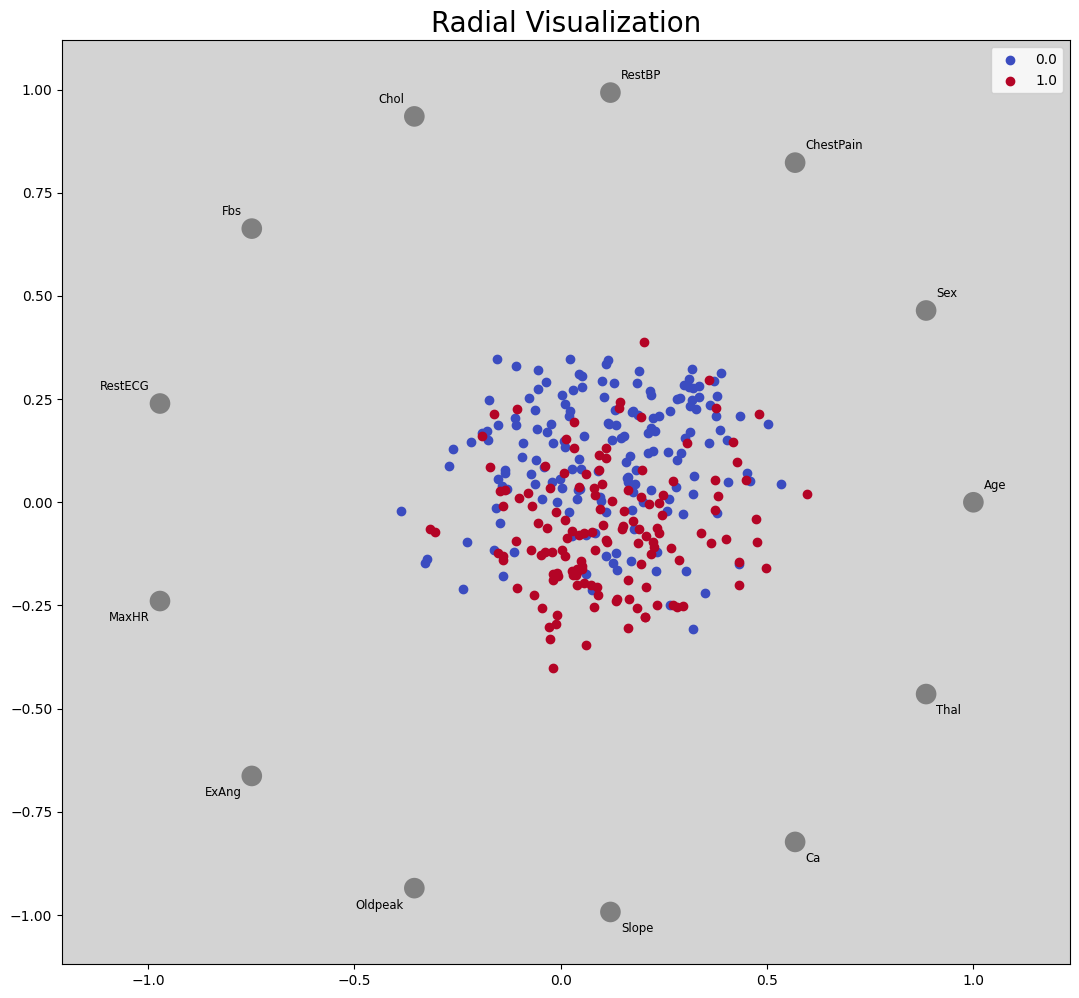

In [20]:
fig, ax = plt.subplots(figsize=(13,12))

copy_df= X.copy()
copy_df["Patient"]=y
radviz(copy_df, "Patient", ax=ax, colormap='coolwarm')
ax.set_facecolor('lightgray')
plt.title('Radial Visualization', fontsize=20)
plt.show()

## Machine Learning Model

### Main

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 0, test_size= 0.25)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X_train:  (227, 13)
y_train:  (227,)
X_test:  (76, 13)
y_test:  (76,)


In [22]:
class ML_Model(object):
    def __init__(self, model, y_predict, y_test):
        self.model = model
        self.y_predict = y_predict
        self.y_test = y_test
        
        # Find scores
        self.accuracy = accuracy_score(y_predict,y_test)*100
        self.precision = precision_score(y_predict,y_test)*100
        self.recall = recall_score(y_predict,y_test)*100
        self.f1 = f1_score(y_predict,y_test)*100
        
    def ConfM(self):
        cm=confusion_matrix(y_test, y_predict)

        plt.rcParams['figure.figsize']=(4,4)
        sns.heatmap(cm,annot=True, cmap='Greens')
        plt.title('Confusion Matrix for Random Forest', fontweight=30, fontsize=20)
        plt.show()
            
    def score(self): # print scores
        print("Model Accuracy Details (%):\n")
        print("Accuracy Score :",self.accuracy) # Total true out of all 
        print("Precision Score:", self.precision) # True positives from all positives
        print("Recall Score:", self.recall) # True positives from real positive instances
        print("f1 Score:", self.f1 ,"\n") # Rates the model based on precision and recall. 0-1 and higher means better score.
        self.ConfM()
        

### Random Forest

In [23]:
RandomForest = RandomForestClassifier(random_state = 0)

model = RandomForest.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [24]:
Rf = ML_Model("Random Forest", y_predict, y_test)

Model Accuracy Details (%):

Accuracy Score : 73.68421052631578
Precision Score: 61.111111111111114
Recall Score: 78.57142857142857
f1 Score: 68.75000000000001 



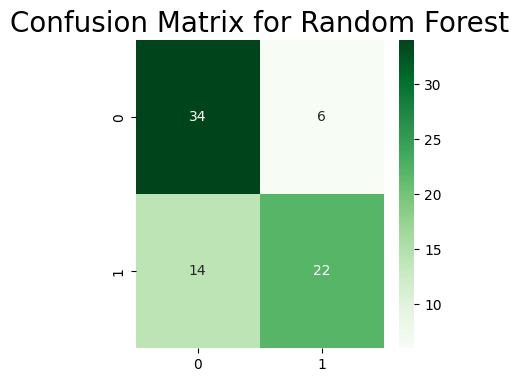

In [25]:
Rf.score()

### Logistic Regression

In [26]:
Logistic_Regression = LogisticRegression(max_iter = 10000000)

model = Logistic_Regression.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [27]:
Lr = ML_Model("Logistic Regression", y_predict, y_test)

Model Accuracy Details (%):

Accuracy Score : 80.26315789473685
Precision Score: 69.44444444444444
Recall Score: 86.20689655172413
f1 Score: 76.92307692307692 



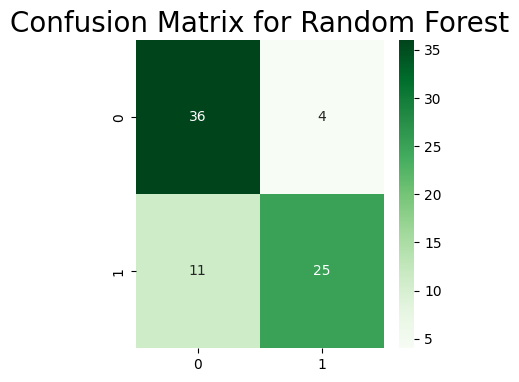

In [28]:
Lr.score()

### Decision Tree

In [29]:
DecisionTree = DecisionTreeClassifier()

model = DecisionTree.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [30]:
Dt = ML_Model("Confusion Matrix", y_predict, y_test)

Model Accuracy Details (%):

Accuracy Score : 71.05263157894737
Precision Score: 61.111111111111114
Recall Score: 73.33333333333333
f1 Score: 66.66666666666666 



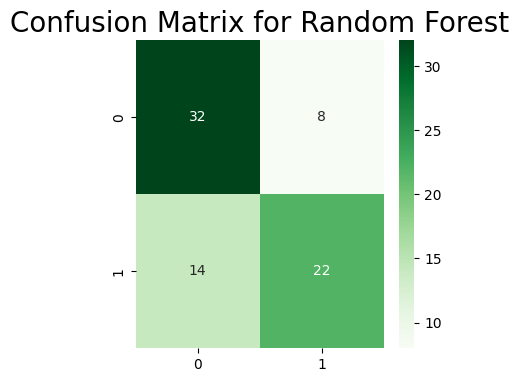

In [31]:
Dt.score()

### Results

In [32]:
compare = pd.DataFrame({"Model": [Rf.model, Lr.model, Dt.model], "Accuracy Scores": [Rf.accuracy, Lr.accuracy, Dt.accuracy]})

In [33]:
compare

,Model,Accuracy Scores
0,Random Forest,73.684211
1,Logistic Regression,80.263158
2,Confusion Matrix,71.052632
